# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees. The Objective is to predict Employee Attrition using Machine Learning.

In [1]:
#importing necessary libaries

#Linear algebra
import numpy as np

#data processing 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Loading the Dataset:

In [2]:
df=pd.read_csv('C:/Users/hp/OneDrive/Documents/HR-Employee-Attrition.csv')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

We can see there are 35 features including the target column. Here "Attrition" is the target column classifying as Yes/No. Hence it is a Classification problem Statement.
 Here,'BusinessTravel','Department','EducationField','Gender','JobRole','Over18','OverTime' are the columns having categorical data and rest all are numerical data..

In [3]:
#checking the Dimension of the dataset

df.shape

(1470, 35)

# Data Exploration/Analysis

In [4]:
#checking the top 5 rows of the dataset.

df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
#checking last 5 rows of the dataset

df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [6]:
#checking sample of the data

df.sample(2)

Age Attrition BusinessTravel  DailyRate              Department  \
895   31        No  Travel_Rarely       1332  Research & Development   
898   43        No  Travel_Rarely        920  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
895                11          2        Medical              1   
898                 3          3  Life Sciences              1   

     EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
895            1251  ...                         4            80   
898            1255  ...                         2            80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
895                 0                  6                      2   
898                 1                 25                      2   

    WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
895               2               6                  5   
898               3               8                  7   

     YearsSinceLastPromotion  YearsWithCurrManager  
895                        0                     1  
898                        0                     7  

[2 rows x 35 columns]

In [7]:
#checking the columns of the data

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
#checking the infomation of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#checking the datatype

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Remark:

1)26 columns are integer

2)9 columns are object datatype

we need to treat object datatype columns so that our ML model can understand the data.

In [10]:
#checking the null values
#no null values are present

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

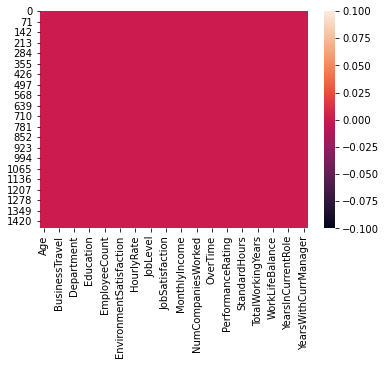

In [11]:
#heatmap for null values

sns.heatmap(df.isnull())

Remark:-No null values are presnt

In [12]:
#checking unique values

df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# Checking whether the target column is balanced or not

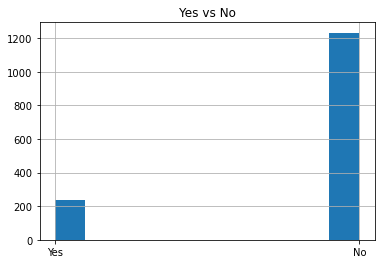

In [13]:
# List of values of target column
df['Attrition'].value_counts()
df['Attrition'].hist(grid='True')
plt.title('Yes vs No')
plt.show()

The label is having only two values either Yes or No.
The histograms shows that the data in the target column is not balanced.

# Statistical Analysis


In [14]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

# observation-

1.we can see that columns are having count 1470 which indicate it doesn't contain any missing values

2.Mean is almost similar to median in every features which indicates negligible amount of skewness is present.

3,Standard Deviation is on higher side in almost all features which indicates data might be spreaded.

4.There are large difference between 75th percentile and max is present in features:

-DistanceFromHome

-TotalWorkingYears

-YearsAtCompany

-YearsInCurrentRole

-YearsSinceLastPromotion

-YearsWithCurrentManager

which indicates that outliers may be present in these features

# EDA

# Univariate Anaysis

No     1233
Yes     237
Name: Attrition, dtype: int64


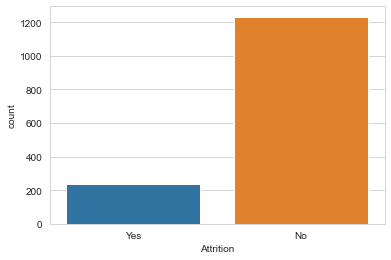

In [15]:
#countplot for target column

sns.set_style("whitegrid")
print(df['Attrition'].value_counts())
sns.countplot(df.Attrition)
plt.show()


From our plot we can see that our data is not balance

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


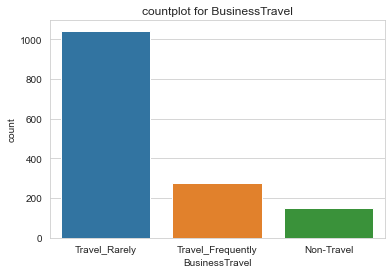

In [16]:
#checking countplot for BussinessTravel

print(df['BusinessTravel'].value_counts())
sns.countplot(df.BusinessTravel)
plt.title('countplot for BusinessTravel')
plt.show()

Remark-

-Majority of observations are for feature Travel_Rarely. -Total number of observations for Travel_Rarely is 1043. -Total number of observations for Travel_Frequently is 277. -Total number of observations for Non-Travel is 150

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


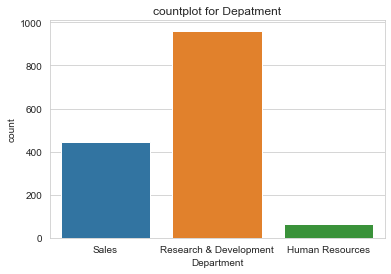

In [17]:
#checking countplot for Department
print(df['Department'].value_counts())
sns.countplot(df.Department)
plt.title('countplot for Depatment')
plt.show()


Remarks:

-Majority of observations are for feature Research & Development. -Total number of observations for feature Research & Development is 961. -Total number of observations for feature Sales is 446. -Total number of observations for feature Human Resources is 63.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


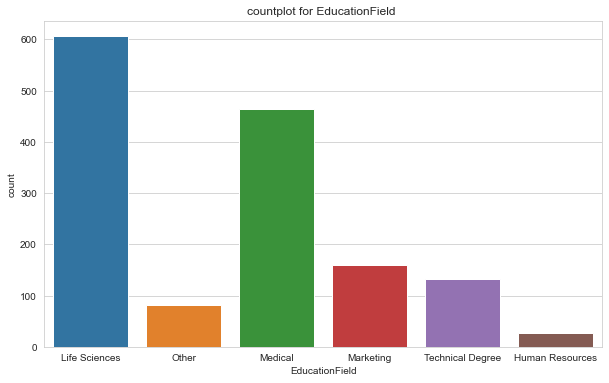

In [18]:
#checking EducationField  using countplot
plt.figure(figsize=(10,6))
sns.countplot(x='EducationField',data=df)
print(df['EducationField'].value_counts())
plt.title('countplot for EducationField ')
plt.show()

Remarks:

-Maximum number of observations are from LifeScience with total of 606 observations. -Minimum number of observations are from Human Resources with total of 27 observations. -All Other features total observations are as follows: -Medical : 464 -Marketing: 159 -Technical Degree: 132 -Other: 82

Male      882
Female    588
Name: Gender, dtype: int64


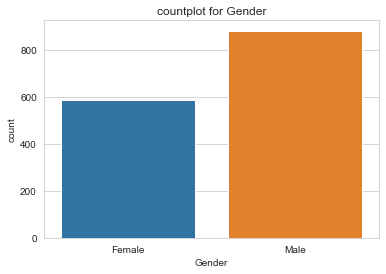

In [19]:
#checking  Gender using countplot

sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())
plt.title('countplot for Gender')
plt.show()

Male is more than Female 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


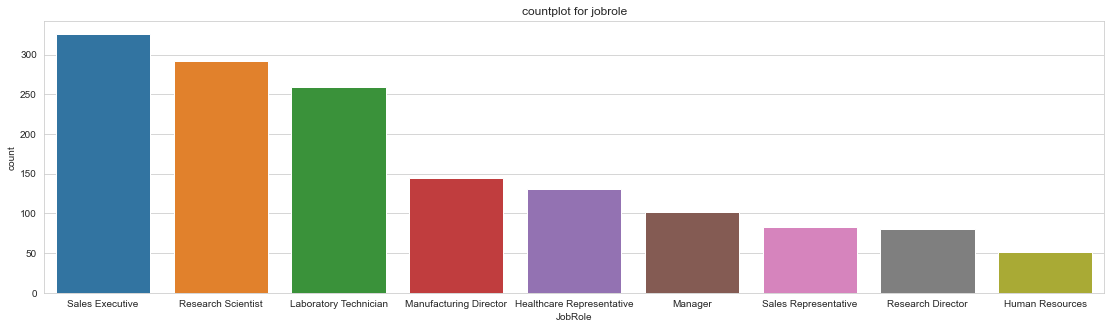

In [20]:
#checking jobrole using countplot
plt.figure(figsize=(19,5))
sns.countplot(x='JobRole',data=df)
print(df['JobRole'].value_counts())
plt.title('countplot for jobrole')
plt.show()

Remarks:

-Maximum number of observations are for Sales Executive with 326 observations. -Minimum number of observations are for Human Resources with 52 observations. -All other JobRole observations are as follows: Research Scientist: 292 Laboratory Technician: 259 Manufacturing Director: 145 Healthcare Representative: 131 Manager: 102 Sales Representative: 83 Research Director: 80

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


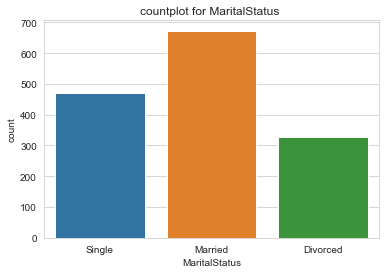

In [21]:
#checking MaritalStatus using countplot

sns.countplot(x='MaritalStatus',data=df)
print(df['MaritalStatus'].value_counts())
plt.title('countplot for MaritalStatus ')
plt.show()

Remarks:

-Maximum number of observations are for Married with 673 observations. -Minimum number of observations are for Divorced with 327 observations. -Number of observations for Single is 470

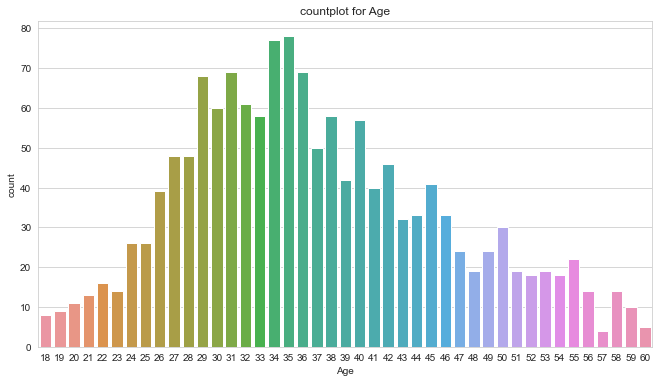

In [22]:
#countplot for Age column

plt.figure(figsize=(11,6))
sns.countplot(df['Age'])
plt.title('countplot for Age')
plt.show()

This is the count of Age feature of the Employees in this dataset. Most of the Employees are in between age group of 26-45.

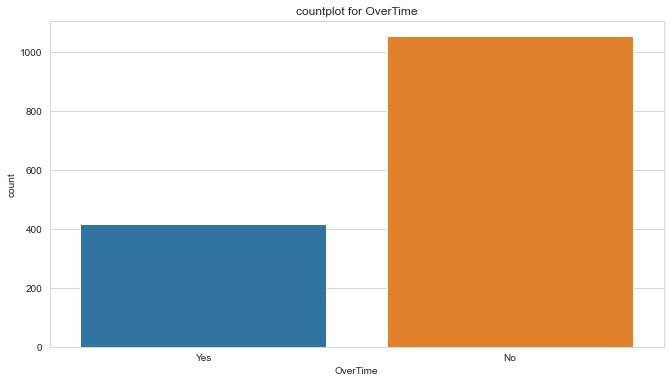

In [23]:
#countplot for OverTime column

plt.figure(figsize=(11,6))
sns.countplot(df['OverTime'])
plt.title('countplot for OverTime')
plt.show()

Remarks:

-Majority of observations are for No OverTime with 1054 observations. -OverTime Yes has 416 observations.

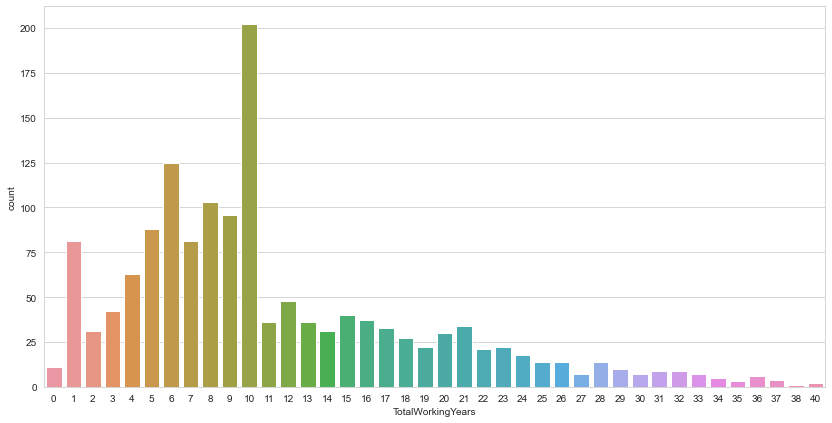

In [24]:
#countplot for TotalWorkingYears

plt.figure(figsize=(14,7))
sns.countplot(df['TotalWorkingYears'])
plt.show()

In [25]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

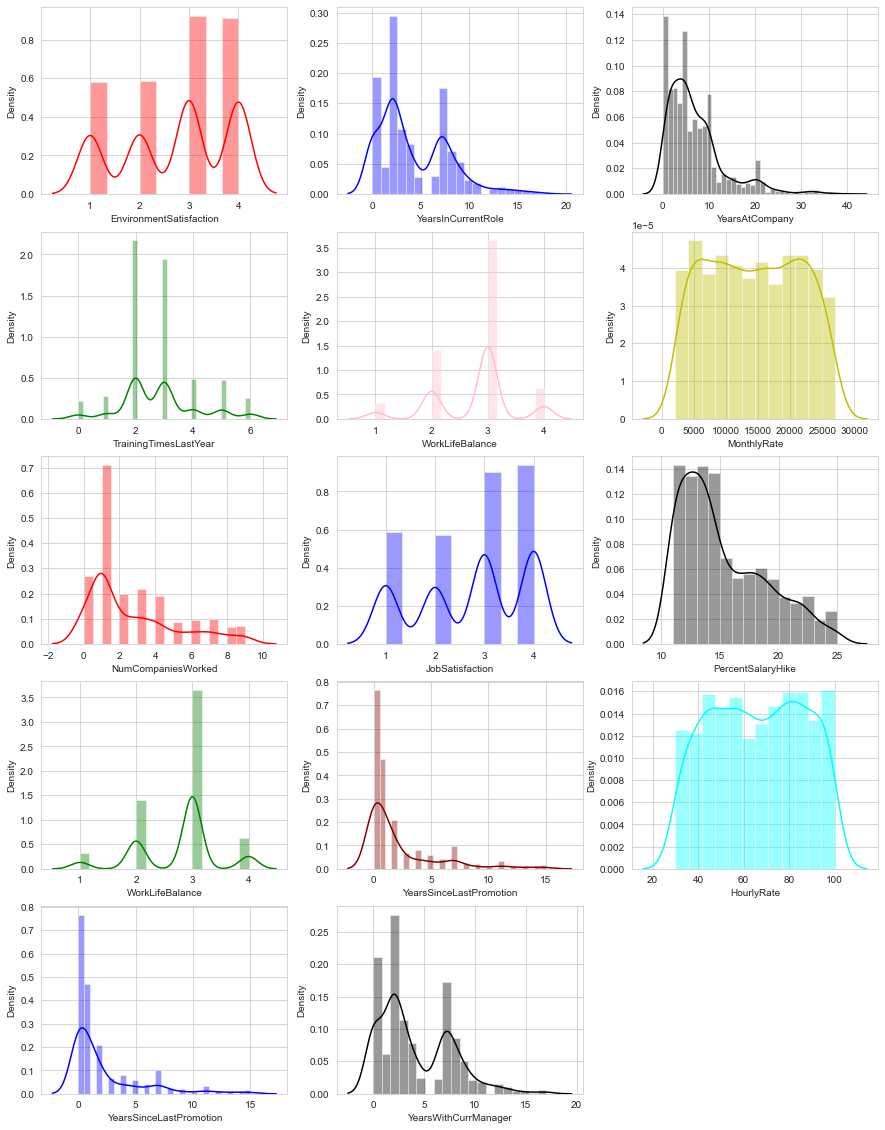

In [26]:
plt.figure(figsize=(15,20))
plt.subplot(5,3,1)
sns.distplot(df.EnvironmentSatisfaction,kde=True,color='red')
plt.subplot(5,3,2)
sns.distplot(df.YearsInCurrentRole,kde=True,color='b')
plt.subplot(5,3,3)
sns.distplot(df.YearsAtCompany,kde=True,color='black')
plt.subplot(5,3,4)
sns.distplot(df.TrainingTimesLastYear,kde=True,color='green')
plt.subplot(5,3,5)
sns.distplot(df.WorkLifeBalance,kde=True,color='pink')
plt.subplot(5,3,6)
sns.distplot(df.MonthlyRate,kde=True,color='y')
plt.subplot(5,3,7)
sns.distplot(df.NumCompaniesWorked,kde=True,color='red')
plt.subplot(5,3,8)
sns.distplot(df.JobSatisfaction,kde=True,color='b')
plt.subplot(5,3,9)
sns.distplot(df.PercentSalaryHike,kde=True,color='black')
plt.subplot(5,3,10)
sns.distplot(df.WorkLifeBalance,kde=True,color='green')
plt.subplot(5,3,11)
sns.distplot(df.YearsSinceLastPromotion,kde=True,color='maroon')
plt.subplot(5,3,12)
sns.distplot(df.HourlyRate,kde=True,color='cyan')
plt.subplot(5,3,13)
sns.distplot(df.YearsSinceLastPromotion,kde=True,color='b')
plt.subplot(5,3,14)
sns.distplot(df.YearsWithCurrManager,kde=True,color='black')


From the graphs we can observe that none of the columns are normally distributed. Also there is a huge skewness in almost of the features, most of them are skewed to the left which means median is more than the mean. This skewness needs to be removed later.

# Bivariate Analysis

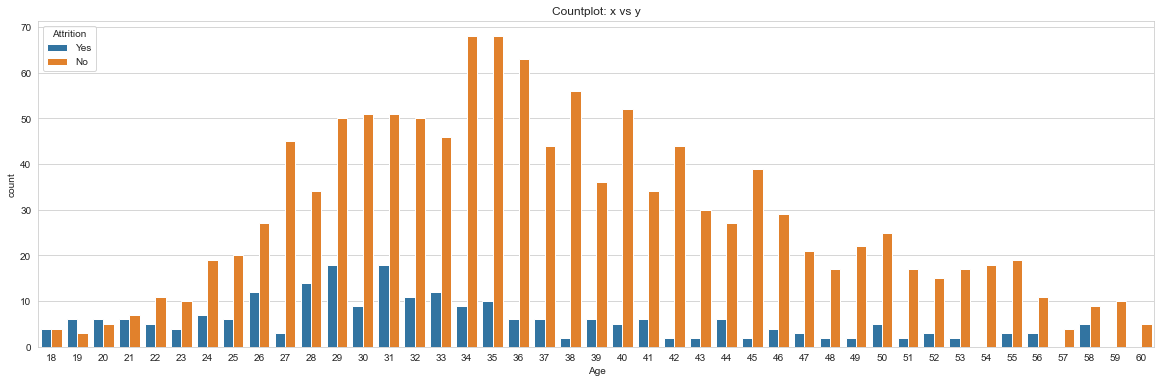

In [27]:
#Checking Relationship between Age and Attrition using countplot.
x = 'Age'
y='Attrition'
plt.figure(figsize=(20,6))
sns.countplot(x,hue=y,data=df)
plt.title("Countplot: x vs y")
plt.show()

# Remark-

Attrition (Yes) is Heigher at Age 19 and 20

No Attrition at Age 57,59,60.

Majority of Attrition(No) is from 29 and 31

Attrition (yes) is maximun At age 29 and 31

Attrition (NO) is maximun At Age 34 and 35

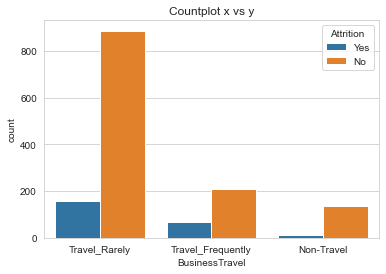

In [28]:
#checking Relation b/w BussinessTravel and Attrition

x='BusinessTravel'
y='Attrition'
sns.countplot(x,hue=y,data=df)
plt.title('Countplot x vs y')
plt.show()

Remark-

-Attrition (Yes) is maxmimum when BusinessTravel is Travel_Rarely.

-Attrition (Yes) is minimum when BusinessTravel is Non-Travel.

-Attrition (No) is maximum when BusinessTravel is Travel_Rarely.

-Attrition (No) is minimum when BusinessTravel is Non-Travel.



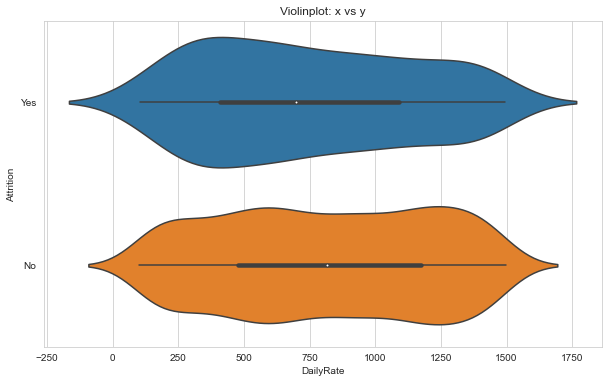

In [29]:
#checking Relationship b/w DailyRate and Attrition

x='DailyRate'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title('Violinplot: x vs y')
plt.show()

Remark

Most of Attrition(Yes) is from DailyRate of 400 to 1100

most of Attrition(No) is from DailyRate of 450 to 1200

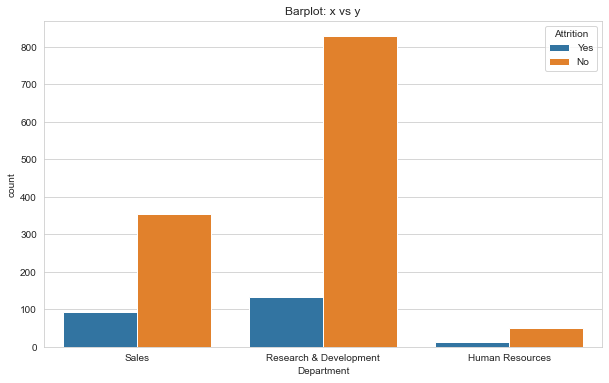

Attrition                No  Yes     Yes(%)      No(%)
Department                                            
Human Resources          51   12  19.047619  80.952381
Research & Development  828  133  13.839750  86.160250
Sales                   354   92  20.627803  79.372197

In [30]:
#checking relation b/w and Depatment And Attrition

x='Department'
y='Attrition'
plt.figure(figsize=(10,6))
sns.countplot(x,hue=y,data=df)
plt.title('Barplot: x vs y')
plt.show()

#Checking with crosstab

cnc=pd.crosstab(df[x],df[y])
cnc['Yes(%)']=cnc['Yes']*100/(cnc['Yes']+cnc['No'])
cnc['No(%)']=cnc['No']*100/(cnc['Yes']+cnc['No'])
cnc


Remarks:

-Rate of Attrition (Yes) is higher in Sales Department.

-Rate of Attrition (Yes) is lower in Research & Development Department.

-Rate of Attrition (No) is higher in Research & Development.

-Rate of Attrition (No) is lower in Sales.

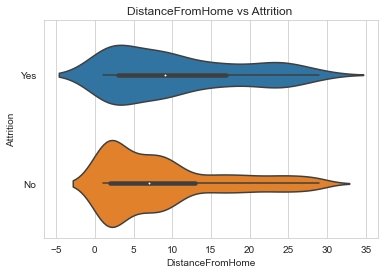

In [31]:
#Checking relation b/w DistanceFromHome and Attrition

sns.violinplot(x='DistanceFromHome',y='Attrition',data=df)
plt.title('DistanceFromHome vs Attrition ')
plt.show()

Remarks:

-Most of Attrition (Yes) is when DistanceFromHome is between 3 to 17.

-Most of Attition (No) is when DistranceFromHome is between 2 to 13.

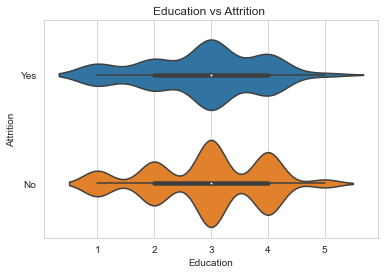

In [32]:
#Checking relation b/w Education and Attrition

sns.violinplot(x='Education',y='Attrition',data=df)
plt.title('Education vs Attrition ')
plt.show()

Remarks:

-Most of Attrition (Yes or No) are between Education 2 to 4.

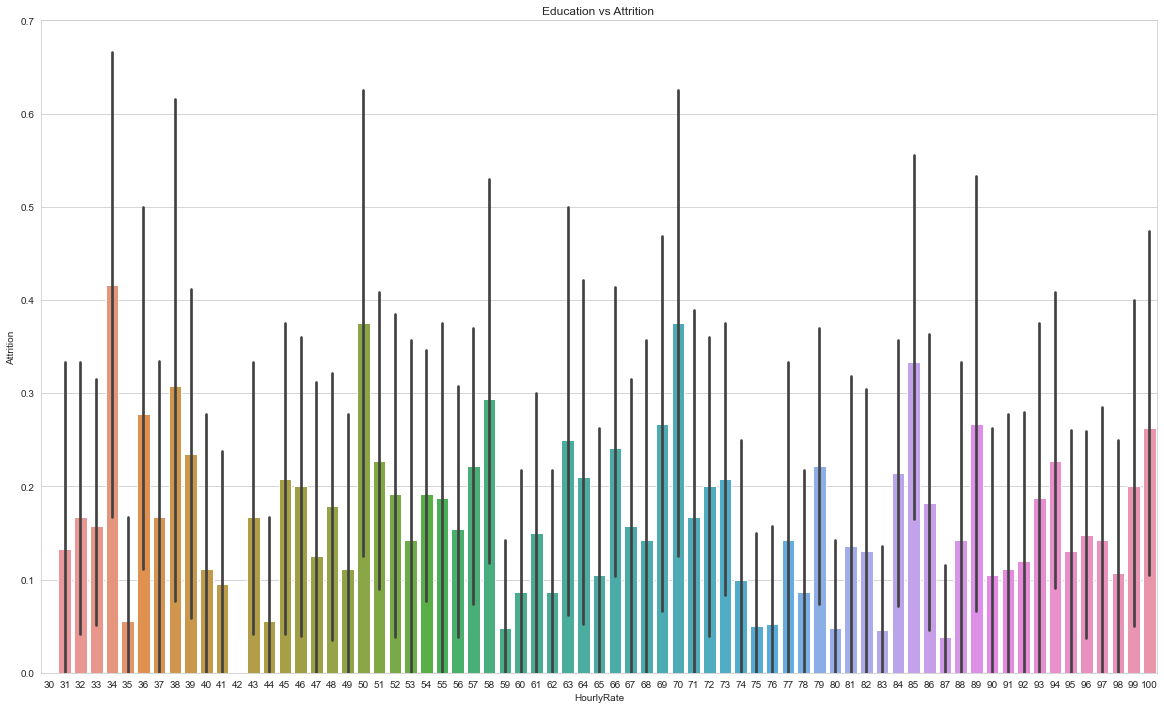

In [125]:
#Checking relation b/w  HourlyRate and Attrition

plt.figure(figsize=(20,12))
sns.barplot(x='HourlyRate',y='Attrition',data=df)
plt.title('Education vs Attrition ')
plt.show()

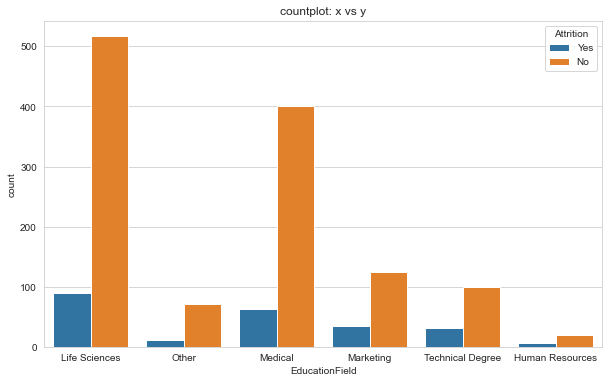

In [33]:
#Checking relation b/w EducationField and Attrition

x='EducationField'
y='Attrition'
plt.figure(figsize=(10,6))
sns.countplot(x,hue=y,data=df)
plt.title('countplot: x vs y')
plt.show()


Remarks:

-Majority of Attrition (Yes) is in Life Sciences and Medical field

Attrition Rate No is more thsn Yes

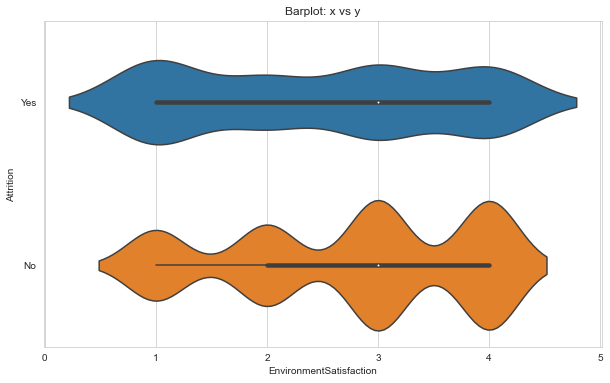

In [34]:
#Checking relation b/w EnvironmentSatisfaction and Attrition

plt.figure(figsize=(10,6))
sns.violinplot(x='EnvironmentSatisfaction',y='Attrition',data=df)
plt.title('Barplot: x vs y')
plt.show()

Remarks:

-Majority of Attrition (Yes) is between 1 to 4 of EnvironmentSatisfaction.

-Majority of Attrition (No) is between 2 to 4 of EnvironmentSatisfaction.

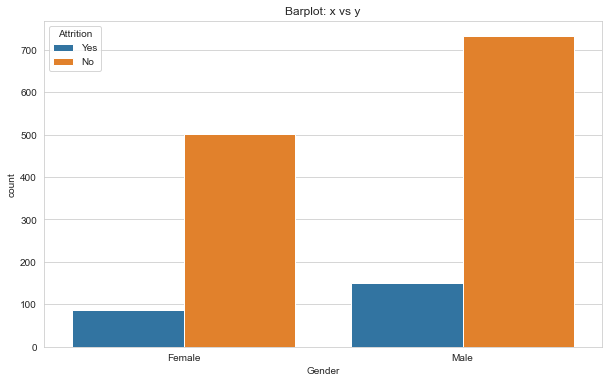

Attrition   No  Yes     Yes(%)      No(%)
Gender                                   
Female     501   87  14.795918  85.204082
Male       732  150  17.006803  82.993197

In [35]:
#Checking relation b/w Gender and Attrition

x='Gender'
y='Attrition'
plt.figure(figsize=(10,6))
sns.countplot(x,hue=y,data=df)
plt.title('Barplot: x vs y')
plt.show()

#Checking with crosstab

cnc=pd.crosstab(df[x],df[y])
cnc['Yes(%)']=cnc['Yes']*100/(cnc['Yes']+cnc['No'])
cnc['No(%)']=cnc['No']*100/(cnc['Yes']+cnc['No'])
cnc

Remarks:

-Attrition (yes) rate is higher in Male than Female.

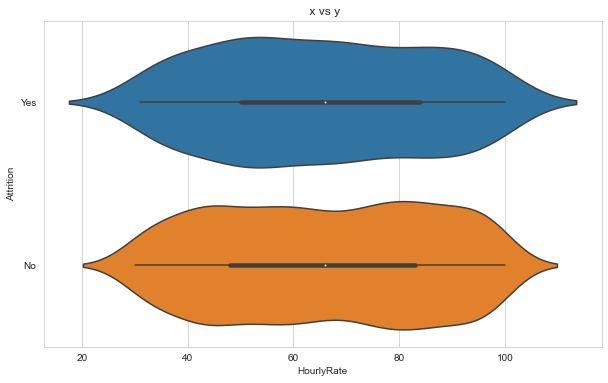

In [36]:
#Checking relation b/w HourlyRate and Attrition

x='HourlyRate'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()


Remarks:

-Most of Attrition (Yes) lies between 50 to 85 HourlyRate.

-Most of Attrition (No) lies between 47 to 83 HourlyRate

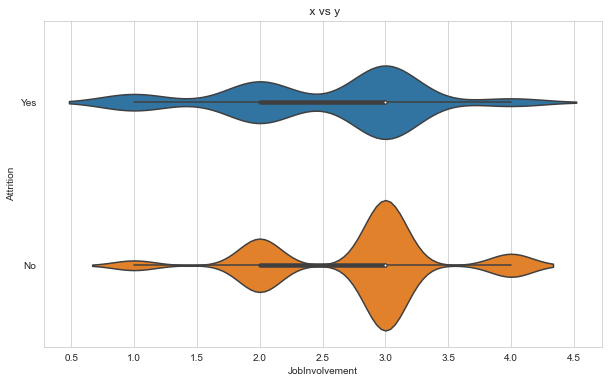

In [37]:
#Checking relation b/w JobInvolvement and Attrition

x='JobInvolvement'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()

Remarks:

-Maximum of Attrition (Yes and No) is with JobInvolvement 3.

-Majority of Attrition (Yes and No) lies between JobInvolvement 2 to 3.

-Attrition (Yes) rate is higher in 1 and lower in 4 of JobInvolvement

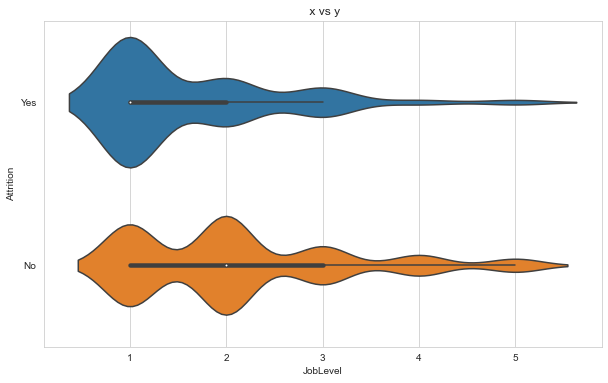

In [38]:
#Checking relation b/w JobLevel and Attrition

x='JobLevel'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()

Remarks:

-Majority of Attrition (Yes) lies between JobLevel 1 and 2.

-Majority of Attrition (No) lies between JobLevel 1 to 3.

-Attrition (Yes) rate is higher in JobLevel 1 and lower in JobLevel 4.

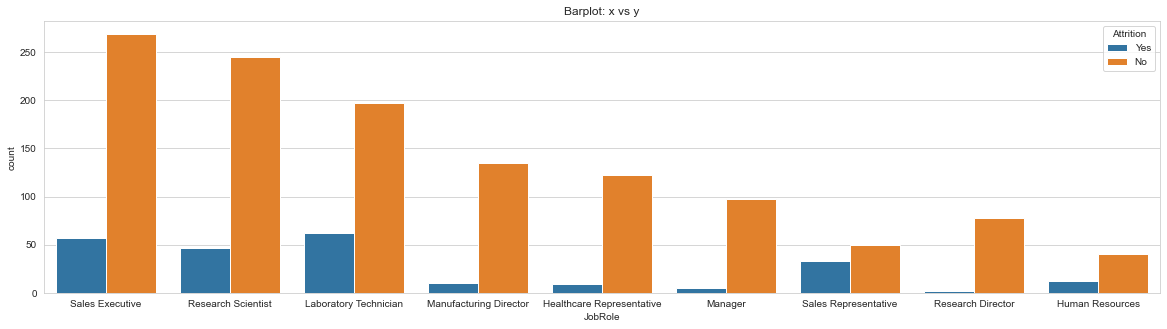

In [39]:
#checking relation b/w and JobRole And Attrition

x='JobRole'
y='Attrition'
plt.figure(figsize=(20,5))
sns.countplot(x,hue=y,data=df)
plt.title('Barplot: x vs y')
plt.show()

Remarks:

-Majority of Attrition (Yes) is with JobRole Laboratory Technician, Research Scientist and Sales Executive.

-Majority of Attrition (No) is with JobRole Laboratory Technician, Research Scientist and Sales Executive.

-Attrition (Yes) rate is higher in JobRole Sales Representative and lower in Research Director.

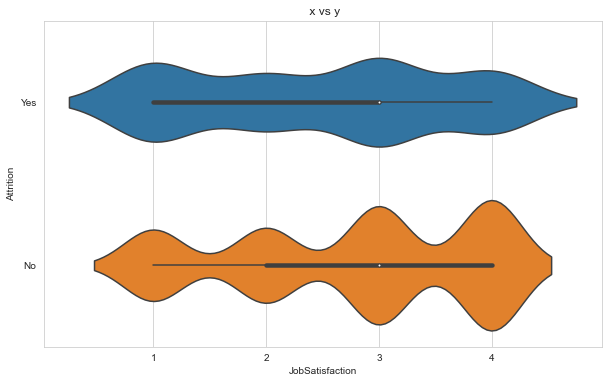

Attrition         No  Yes     Yes(%)      No(%)
JobSatisfaction                                
1                223   66  22.837370  77.162630
2                234   46  16.428571  83.571429
3                369   73  16.515837  83.484163
4                407   52  11.328976  88.671024

In [40]:
#Checking relation b/w  JobSatisfaction and Attrition

x='JobSatisfaction'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()

#Checking with crosstab

cnc=pd.crosstab(df[x],df[y])
cnc['Yes(%)']=cnc['Yes']*100/(cnc['Yes']+cnc['No'])
cnc['No(%)']=cnc['No']*100/(cnc['Yes']+cnc['No'])
cnc

Remarks:

-Majority of Attrition (Yes) lies between JobSatisfaction 1 and 3.

-Majority of Attrition (No) lies between JobSatisfaction 2 and 4.

-Attrition (Yes) rate is higher in 1 and lower in 4 of JobSatisfaction

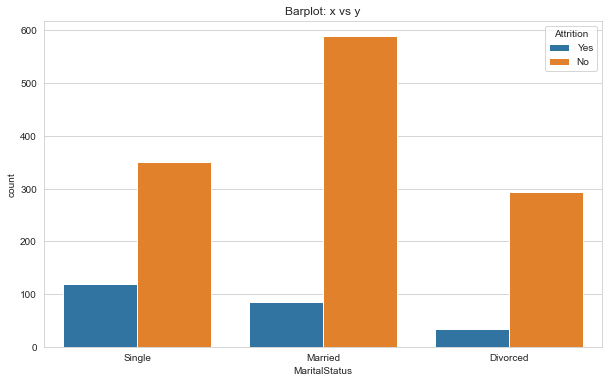

Attrition       No  Yes     Yes(%)      No(%)
MaritalStatus                                
Divorced       294   33  10.091743  89.908257
Married        589   84  12.481426  87.518574
Single         350  120  25.531915  74.468085

In [41]:
#Checking relation b/w MaritalStatus and Attrition

x='MaritalStatus'
y='Attrition'
plt.figure(figsize=(10,6))
sns.countplot(x,hue=y,data=df)
plt.title('Barplot: x vs y')
plt.show()


#Checking with crosstab

cnc=pd.crosstab(df[x],df[y])
cnc['Yes(%)']=cnc['Yes']*100/(cnc['Yes']+cnc['No'])
cnc['No(%)']=cnc['No']*100/(cnc['Yes']+cnc['No'])
cnc

Remarks:

-Attrition (Yes) rate is higher in Single as compared to Married and Divorced.

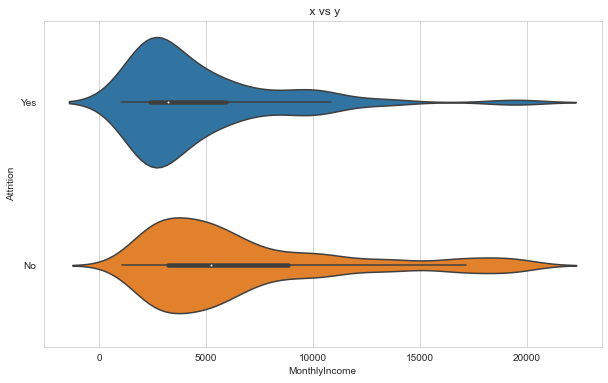

In [42]:
#Checking relation b/w MonthlyIncome  and Attrition

x='MonthlyIncome'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()

Remarks:

-Majority of Attrition (Yes) lies between 2500 to 6000 of MonthlyIncome.

-Majority of Attrition (No) lies between 3000 to 9000 of MonthlyIncome.

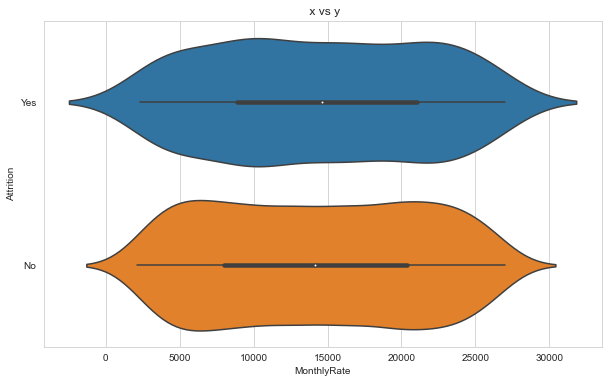

In [43]:
#Checking relation b/w MonthlyRate  and Attrition

x='MonthlyRate'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()

Remarks:

-Majority of Attrition (Yes) lies between 9000 to 22000 of MonthlyRate.

-Majority of Attrition (No) lies between 8000 to 20500 of MonthlyRate.

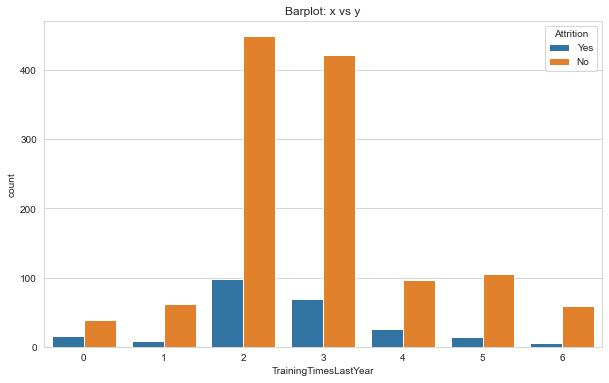

In [44]:
#Checking relation b/w  StandardHours and Attrition

x='TrainingTimesLastYear'
y='Attrition'
plt.figure(figsize=(10,6))
sns.countplot(x,hue=y,data=df)
plt.title('Barplot: x vs y')
plt.show()

Remarks:

-Attrition (Yes) rate is lower than Attrition (No).

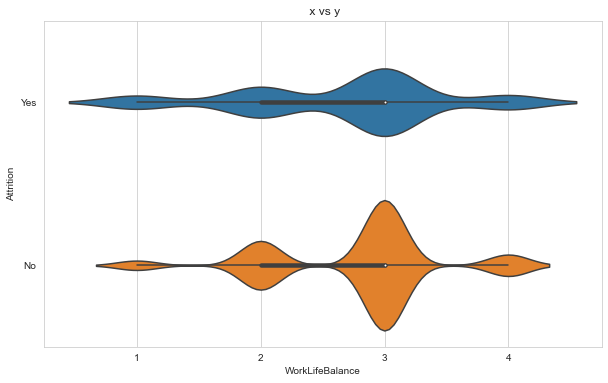

In [45]:
#Checking relation b/w WorkLifeBalance  and Attrition

x='WorkLifeBalance'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()

Remarks:

-Majority of Attrition (Yes and No) lies between WorkLifeBalance 2 and 3.

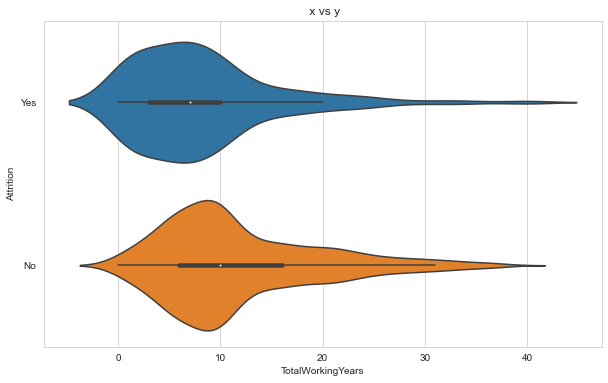

In [46]:
#Checking relation b/w TotalWorkingYears  and Attrition

x='TotalWorkingYears'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()

Remarks:

-Majority of Attrition (Yes) lies between TotalWorkingYears 3 to 10.

-Majority of Attrition (No) lies between TotalWorkingYears 6 to 17.

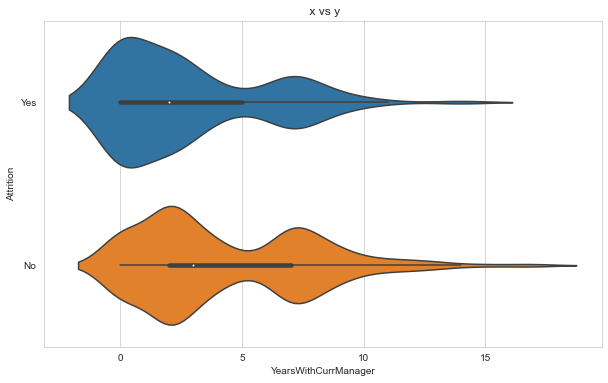

In [47]:
#Checking relation b/w YearsWithCurrManager  and Attrition

x='YearsWithCurrManager'
y='Attrition'
plt.figure(figsize=(10,6))
sns.violinplot(x,y,data=df)
plt.title(' x vs y')
plt.show()

Remarks:

-Majority of Attrition (Yes) lies between 0 to 5.

-Majority of Attrition (No) lies between 2 to 7.

Comparison of Gender with other Factors

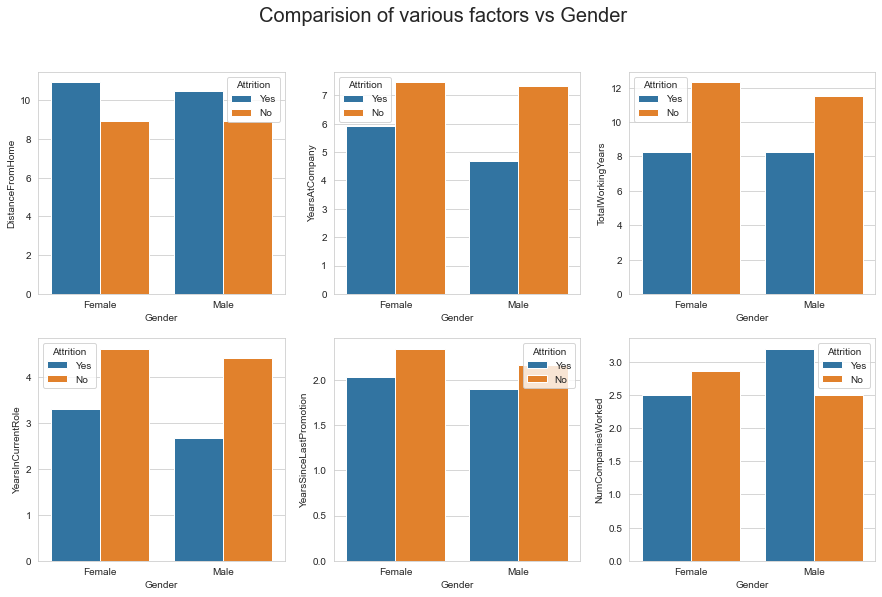

In [48]:
fig,ax = plt.subplots(2,3, figsize=(15,9))           
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(df['Gender'],df['DistanceFromHome'],hue = df['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(df['Gender'],df['YearsAtCompany'],hue = df['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(df['Gender'],df['TotalWorkingYears'],hue = df['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(df['Gender'],df['YearsInCurrentRole'],hue = df['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(df['Gender'],df['YearsSinceLastPromotion'],hue = df['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(df['Gender'],df['NumCompaniesWorked'],hue = df['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

Distance from Home matters more Female as compared with Male
Female Employees spent more years in one company than Male

# Multivariate Analysis

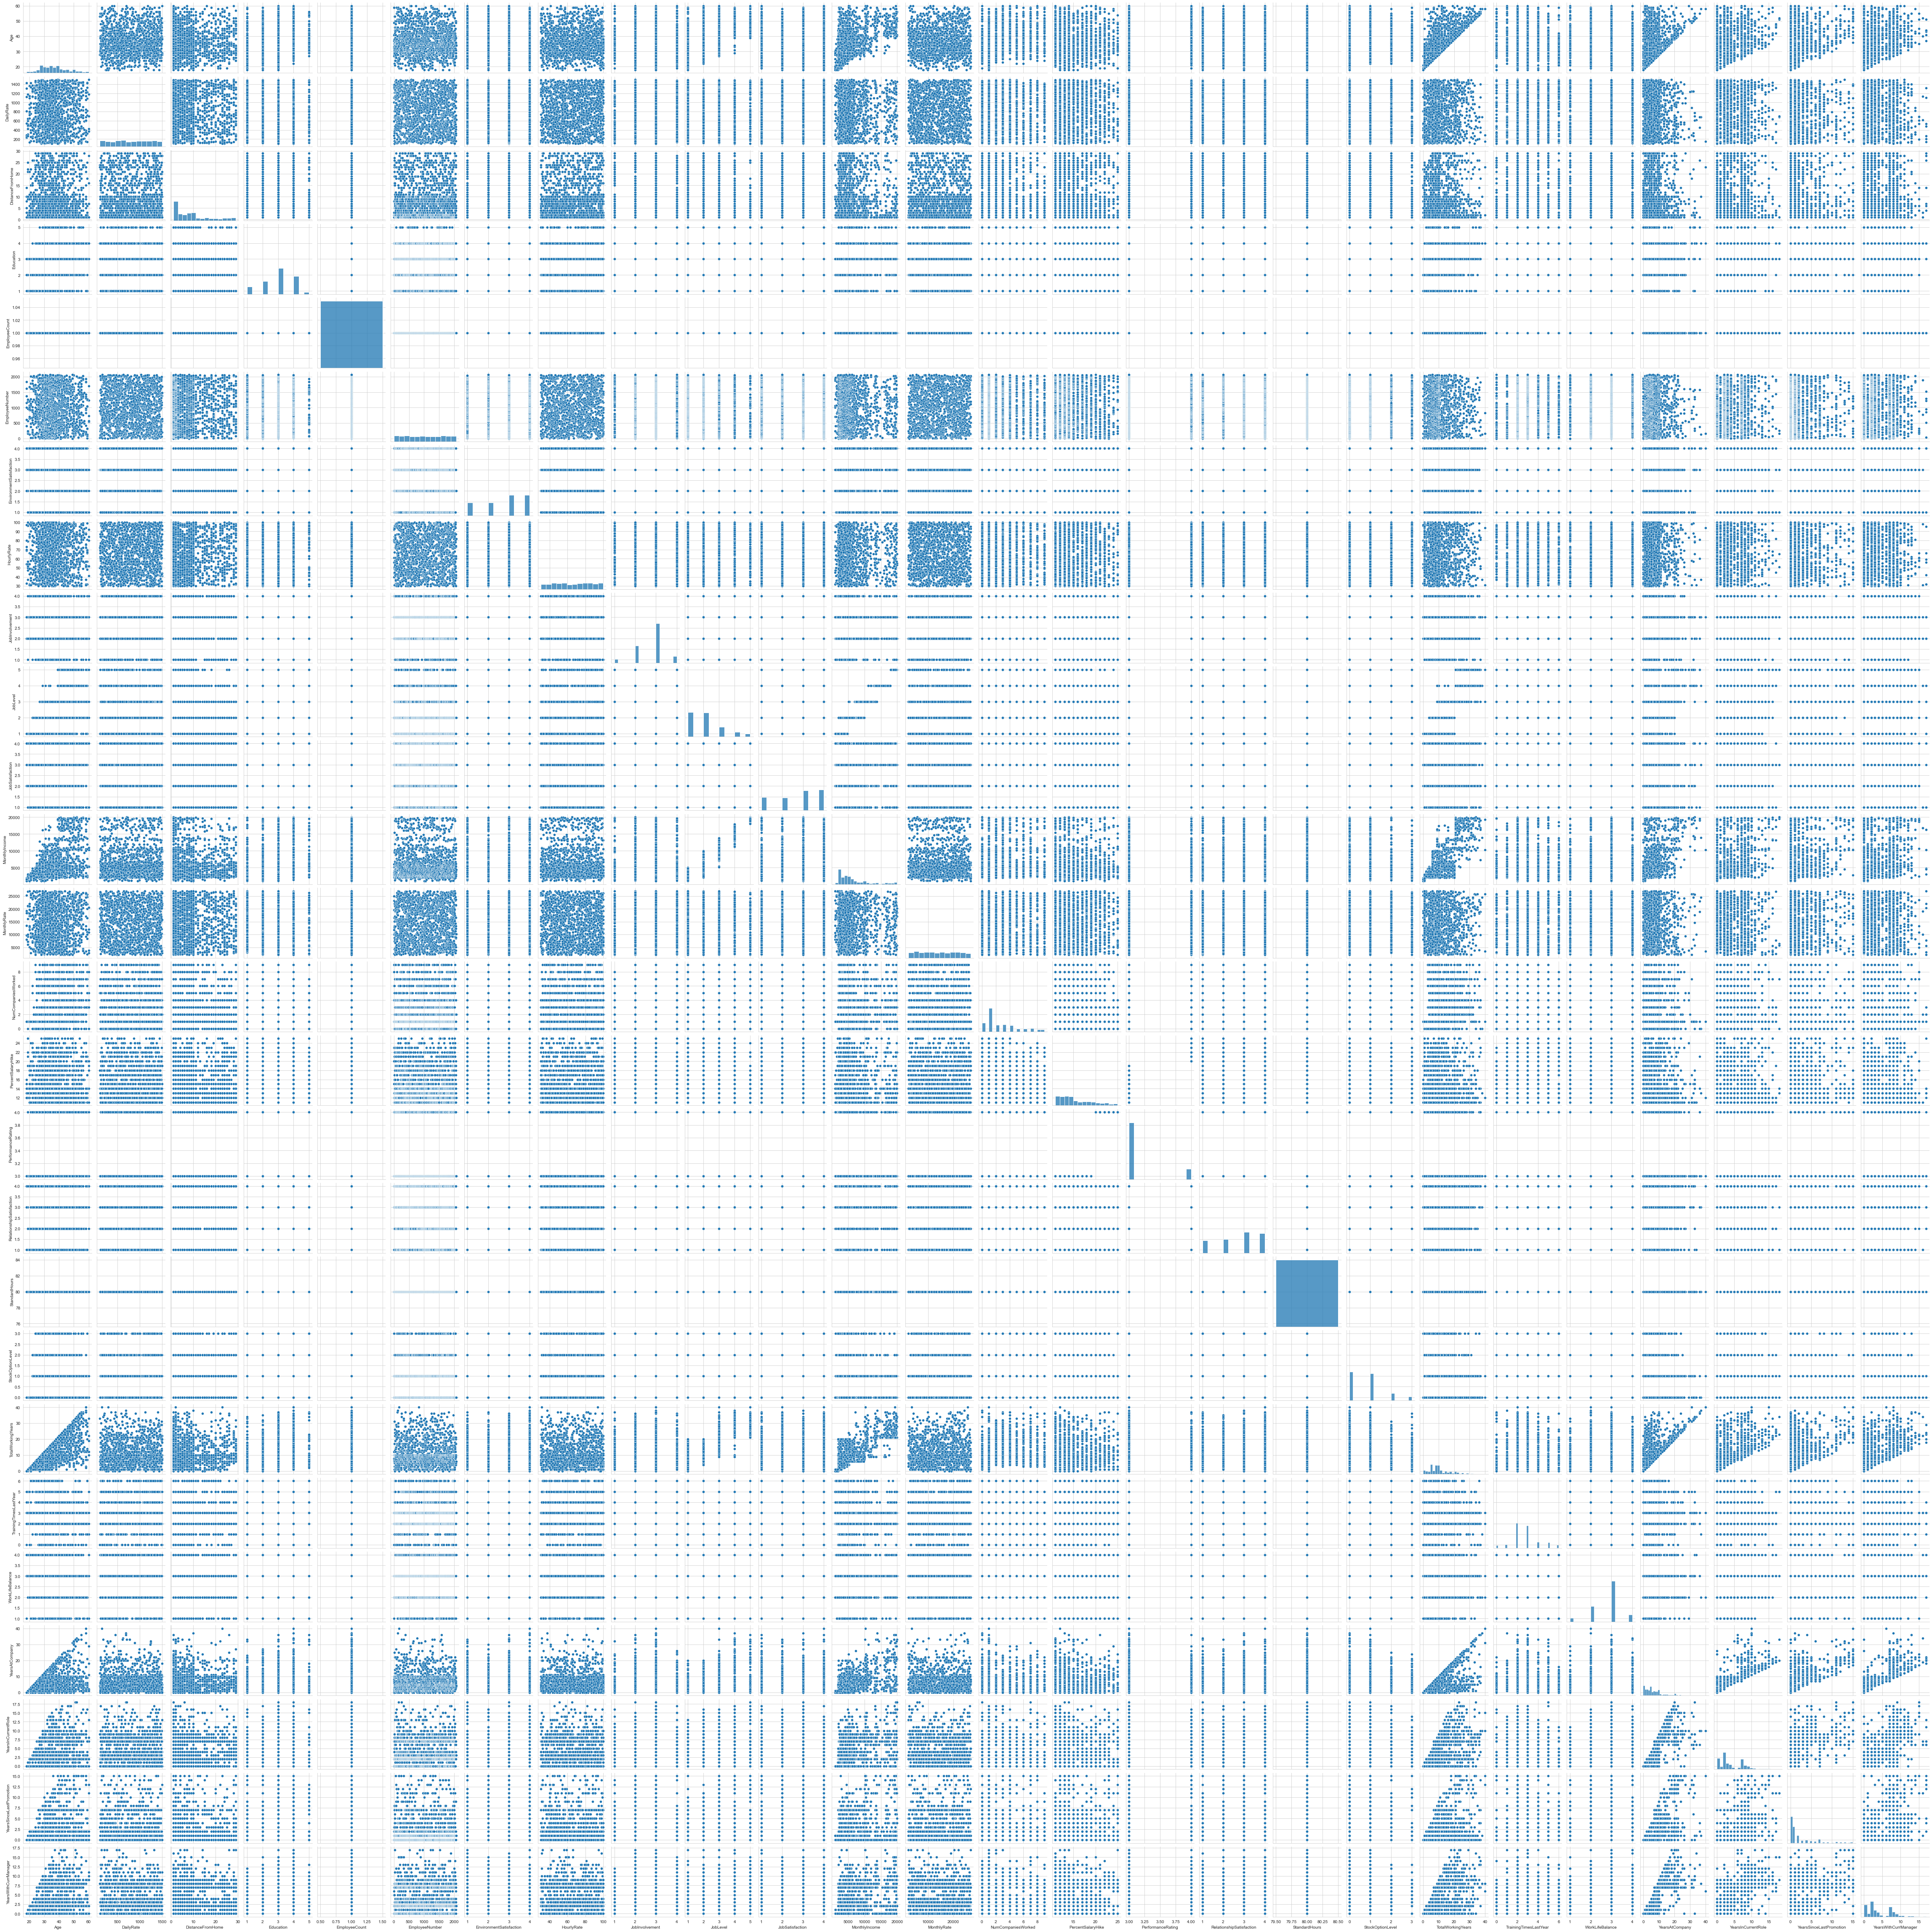

In [629]:
sns.pairplot(df)

This pairplot gives the pairwise relation between the columns which is plotted on the basis of the target variable'Attrition'. WE can also observe relatiponship between all the featues and the labels.

# Encoding the dataframe

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [50]:
#checking top 5 rows after encoding
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 35 columns]

Now our data is encoded

# Description of Dataset

In [51]:
#checking for Statistical Summary of the dataset

df.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EmployeeCount  \
count       1470.000000  1470.000000     1470.000000         1470.0   
mean           9.192517     2.912925        2.247619            1.0   
std            8.106864     1.024165        1.331369            0.0   
min            1.000000     1.000000        0.000000            1.0   
25%            2.000000     2.000000        1.000000            1.0   
50%            7.000000     3.000000        2.000000            1.0   
75%           14.000000     4.000000        3.000000            1.0   
max           29.000000     5.000000        5.000000            1.0   

       EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean      1024.865306  ...                  2.712245           80.0   
std        602.024335  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%        491.250000  ...                  2.000000           80.0   
50%       1020.500000  ...                  3.000000           80.0   
75%       1555.750000  ...                  4.000000           80.0   
max       2068.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 34 columns]

# Heatmap And Describe Finding

<AxesSubplot:>

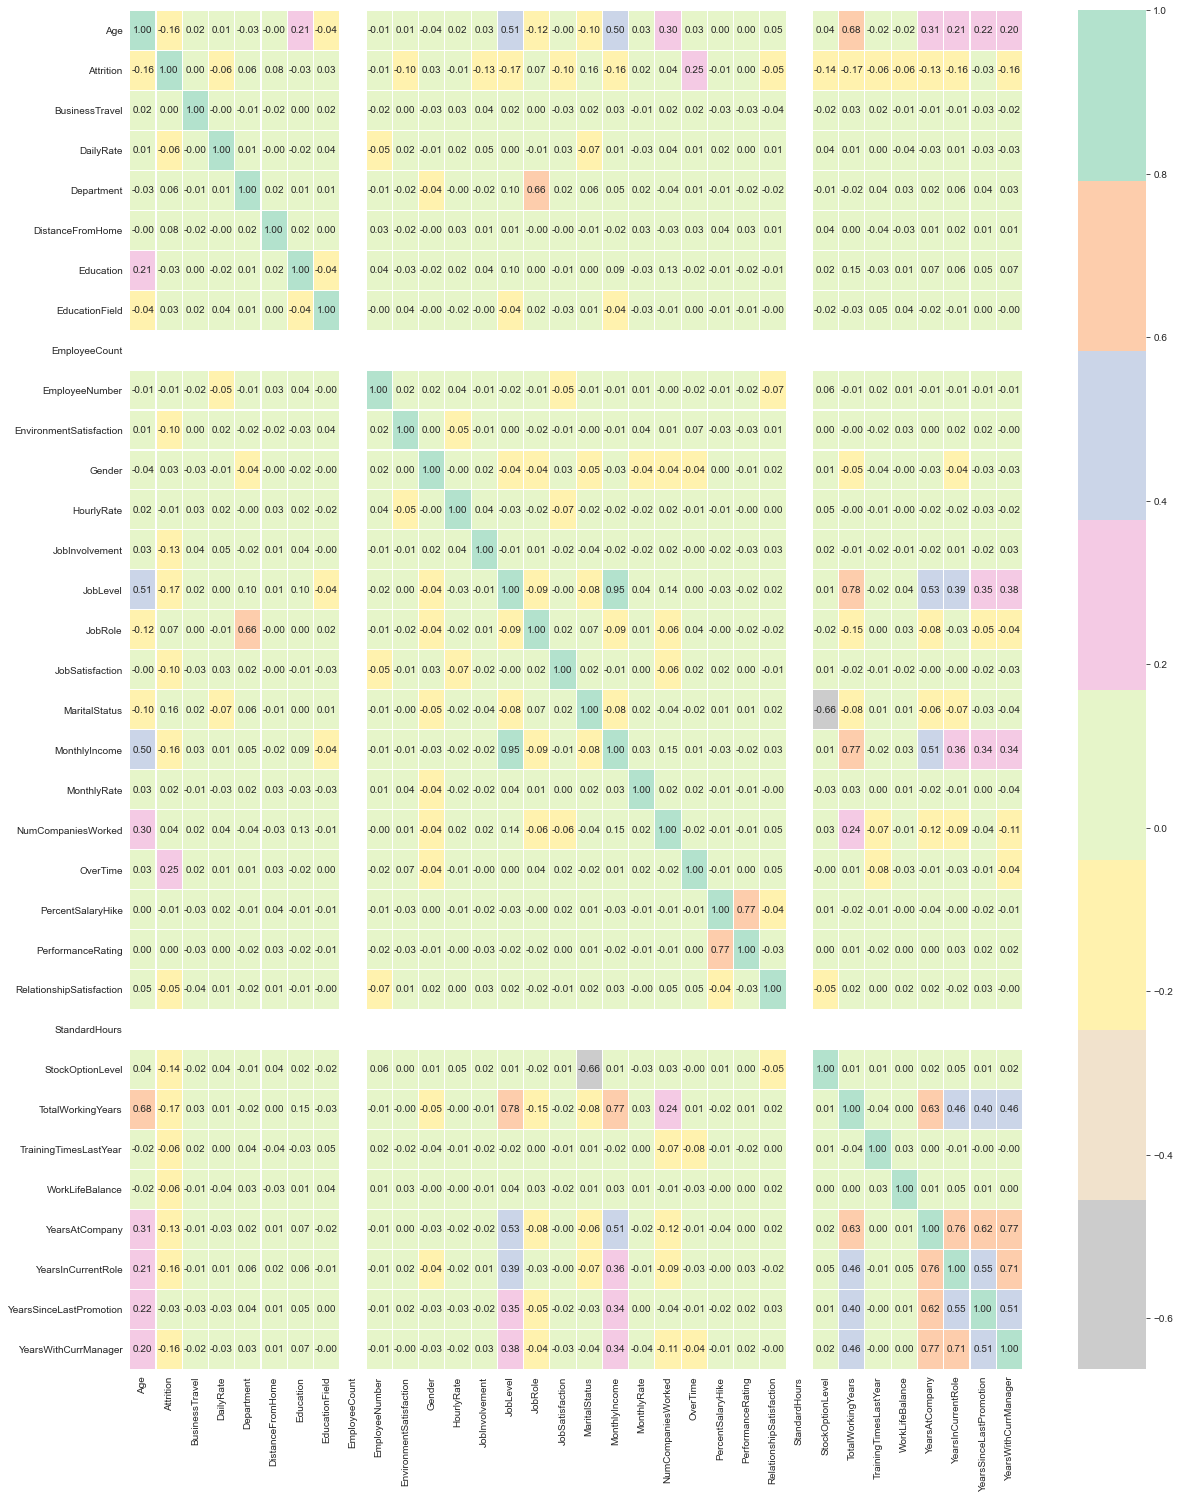

In [52]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True,linewidths = 0.1,fmt='0.2f',cmap='Pastel2_r')

Remarks:We can see that Some columns are really having good correlation like 80% annd 70%. If two columns that might be having 90% correlated then we had to drop one column but in this dataset no one is having more than 90%

# Visualizing Correlation between label and features using Barplot

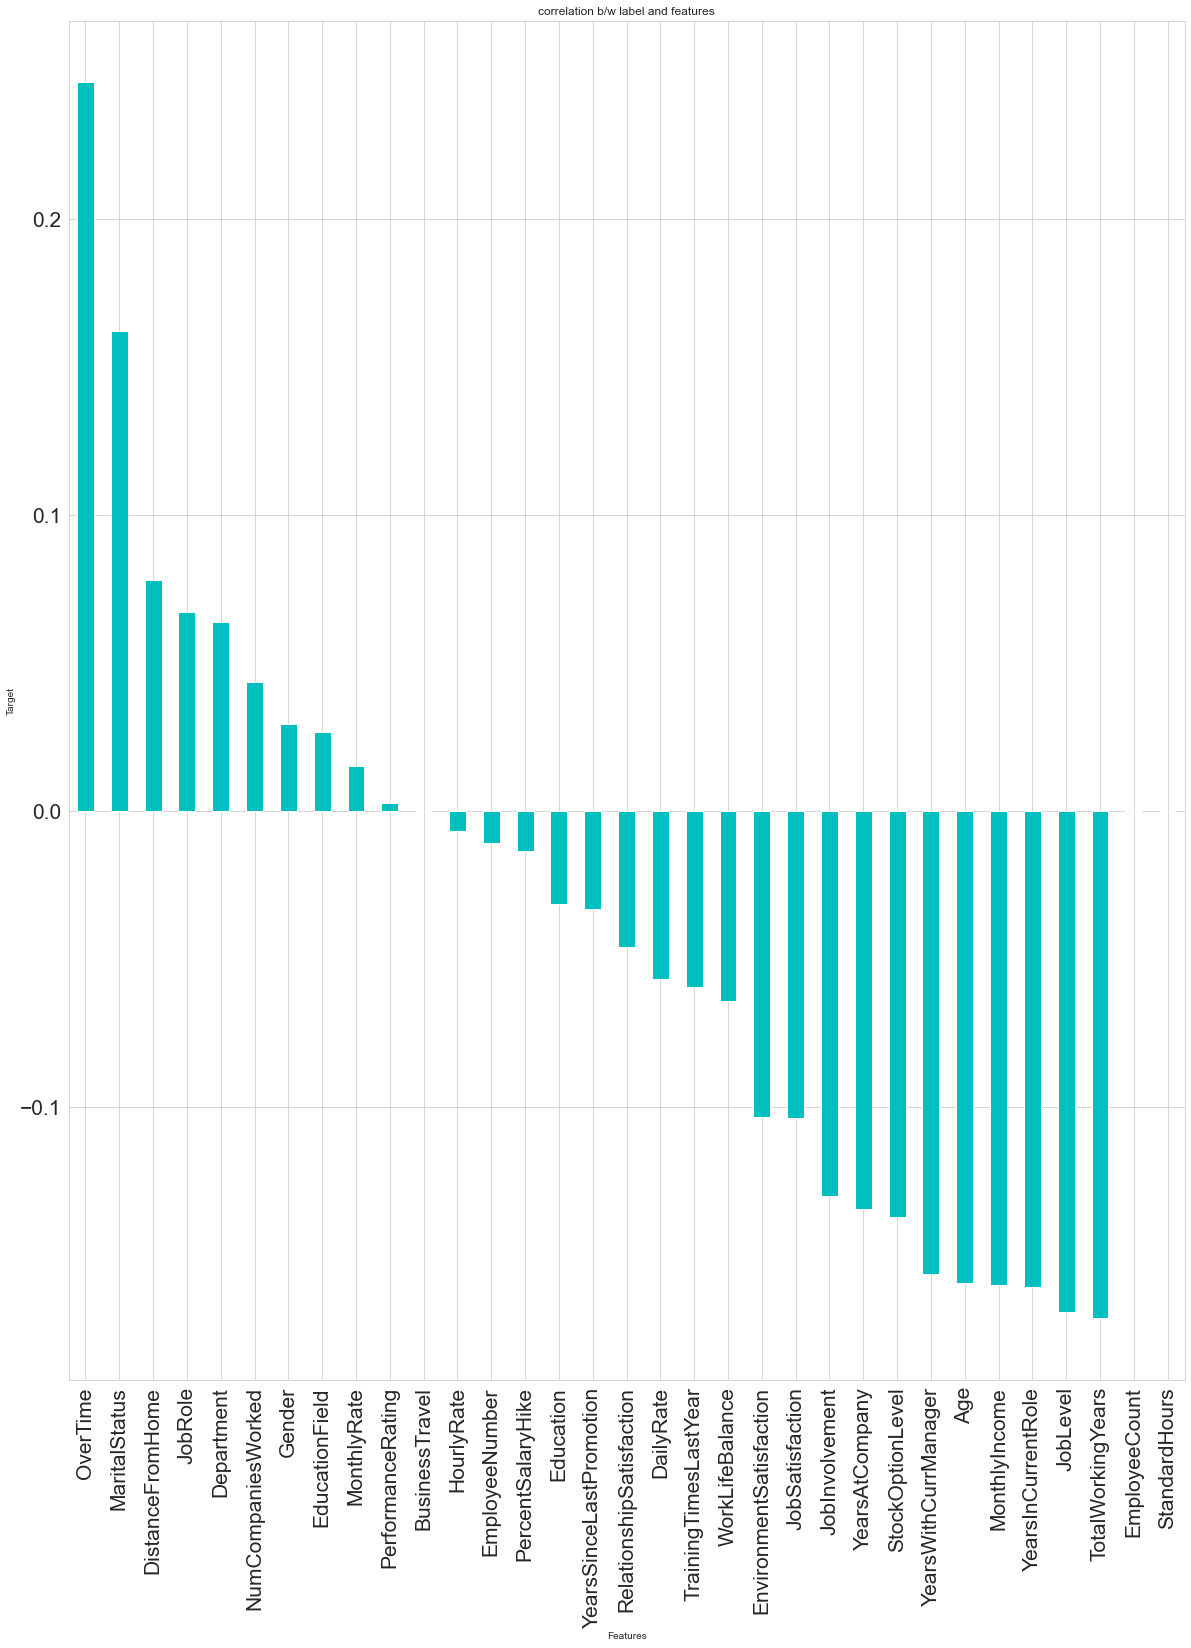

In [53]:
#checking correlation values on plot

plt.figure(figsize=(20,25))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c',fontsize=21)
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('correlation b/w label and features')
plt.show()

# Positively Correlated Columns :
OverTime

MaritalStatus

DistanceFromHome

JobRole

Department

NumCompaniesWorked

Gender

EducationField

MonthlyRate

Performance Rating


# Negatively Correlated Columns:
    
TotalWorkingYears

JobLevel

YearsInCurrentRole

MonthlyIncome

Age

YearsWithCurManager

StockOptionLevel

YearsAtcompany

JobInvolvement

JobSatisfaction

EnvironmentSatisfaction

WorkLifeBalance

In [54]:
#Droping the columns

df=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)


Remarks: We dropped these columns because they were not useful in model building. over18 and standardHours have only one value and employeenumber having only unique incremented values.

# Checking for Outliers

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Attrition                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
BusinessTravel               AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Department                  AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
DistanceFromHome               AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Education                   AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
EducationField               AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
Gender                      AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
HourlyRate                     AxesSubplot(0.125,0.566951;0.133621x0.0920732)
JobInvolvement              AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
JobLevel                     AxesSubplot(0.44569,0.566951;0.1336

<Figure size 1440x720 with 0 Axes>

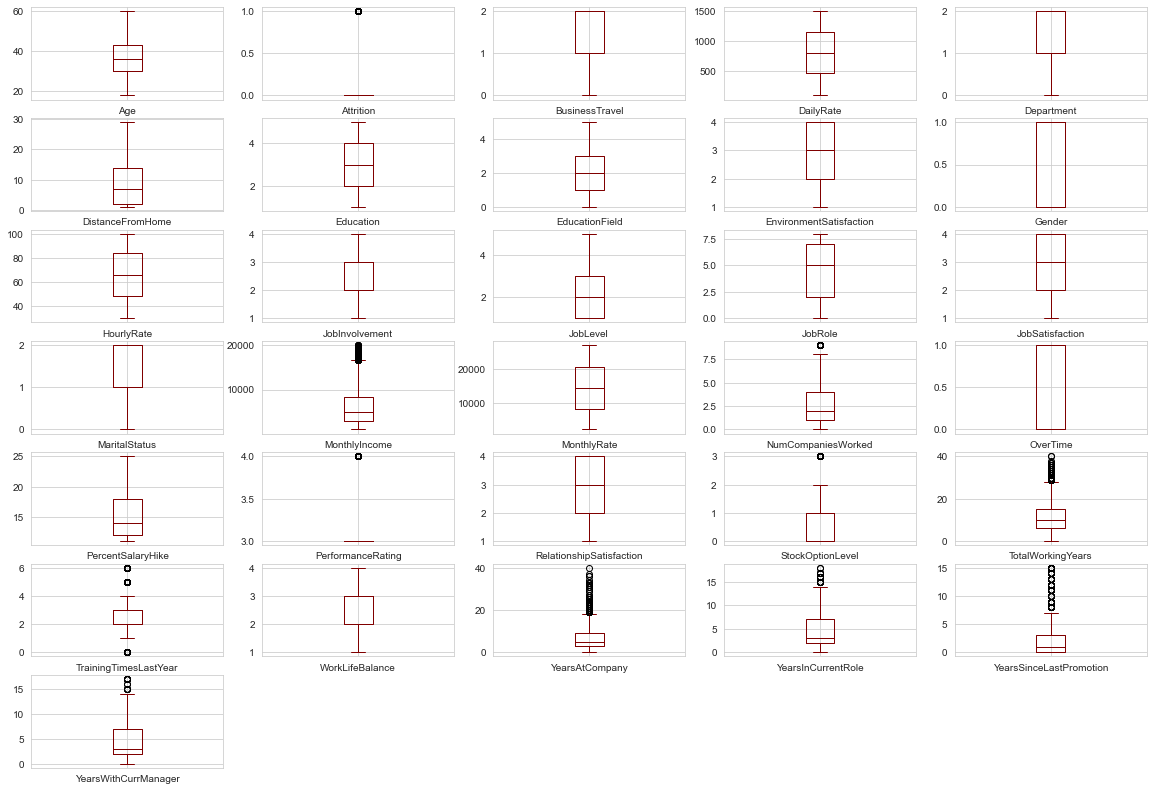

In [55]:
#plotting boxplot for outliers

plt.figure(figsize=(20,10))

df.plot(kind='box',subplots=True,layout=(7,5),figsize=(20,14),color='maroon')

Remarks: Outliers are present so lets try to remove them.

# Removing outliers
Zscore method

In [56]:
features =df[["MonthlyIncome","NumCompaniesWorked","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]

In [57]:
#removing the outliers

from scipy.stats import zscore
z=np.abs(zscore(features))
z.shape

(1470, 9)

In [58]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([8, 7, 5, 7, 6, 7, 3, 3, 5, 7, 6, 7, 8, 3, 5, 7, 8, 7, 3, 8, 5, 6,
       7, 6, 8, 5, 7, 3, 5, 6, 7, 7, 8, 3, 5, 5, 7, 7, 3, 6, 5, 5, 7, 5,
       8, 7, 5, 3, 5, 7, 8, 3, 8, 5, 7, 5, 8, 7, 6, 6, 5, 7, 7, 7, 5, 7,
       7, 8, 3, 5, 7, 5, 7, 7

In [59]:
#New df after outlers removel

df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


In [60]:
#checking data loss percent

data_loss=(1470-1387)/1470*100
data_loss

5.646258503401361

So, using zscore the data loss is not more

# Separating features and labels

In [61]:
#splitting the indepandent and depandent columns

x=df_new.drop(['Attrition'],axis=1)
y=df_new['Attrition']

# Checking for Skewness

In [62]:
#checking for the skewness

x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

skewness is present in our dataset

# Removing the skewness from the dataset:
We're using power_transform function to remove skewness from the dataset

In [63]:
from sklearn.preprocessing import power_transform

df_new=power_transform(x,method='yeo-johnson')
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

We can see that after using the function power_transform the skewness is removed from the dataset.

# Checking Multicolinearity

In [64]:
#checking Multicolinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF Features']=[variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif['Features']=x.columns
vif



VIF Features                  Features
0      30.937930                       Age
1       6.667388            BusinessTravel
2       5.041042                 DailyRate
3      13.849252                Department
4       2.320873          DistanceFromHome
5       9.339536                 Education
6       3.889948            EducationField
7       7.188979   EnvironmentSatisfaction
8       2.531225                    Gender
9      11.302474                HourlyRate
10     15.245642            JobInvolvement
11     47.721474                  JobLevel
12      8.469352                   JobRole
13      7.131744           JobSatisfaction
14      5.838069             MaritalStatus
15     28.199540             MonthlyIncome
16      5.093237               MonthlyRate
17      2.704471        NumCompaniesWorked
18      1.436858                  OverTime
19     42.577573         PercentSalaryHike
20    121.885631         PerformanceRating
21      7.227946  RelationshipSatisfaction
22      3.326677          StockOptionLevel
23     12.857933         TotalWorkingYears
24      5.737649     TrainingTimesLastYear
25     15.675339           WorkLifeBalance
26     13.151026            YearsAtCompany
27      7.217269        YearsInCurrentRole
28      2.161566   YearsSinceLastPromotion
29      7.843810      YearsWithCurrManager

# Balancing the data:

In [65]:
#balancing the data by using smote
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
x_new=pd.DataFrame(x_over,columns=x.columns)
y_new=pd.DataFrame(y_over,columns=['Attrition'])

In [81]:
y_new.value_counts()


Attrition
0            1158
1            1158
dtype: int64

Text(0.5, 1.0, 'Balanced data')

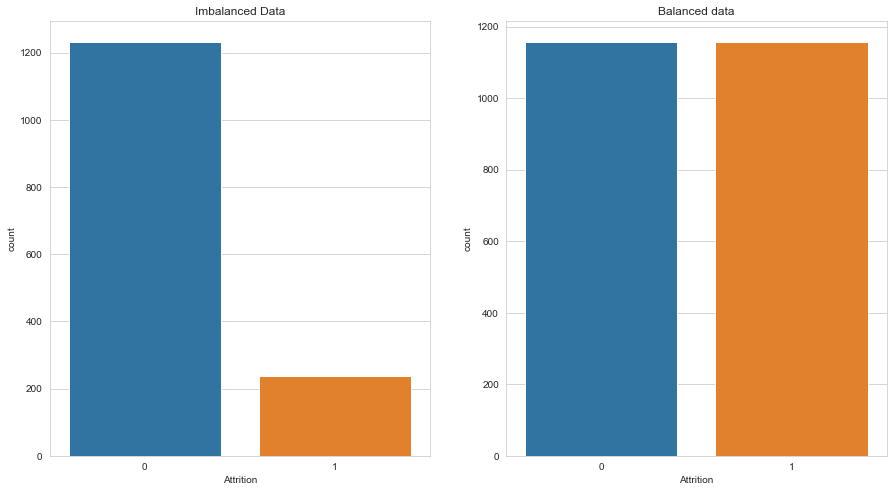

In [83]:
#plot for balanced and imbalanced data

import seaborn as sns
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df['Attrition'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Attrition'])
plt.title("Balanced data")

now our data is balanced

# Feature Scaling:

In [66]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=(x.columns))

Now our data is scaled

# Finding best random state:

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
maxAcc=0
maxRs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print('The best accuracy is',maxAcc,'on Random State',maxRs)

The best accuracy is 0.8776978417266187 on Random State 99


We found that the best random_state value is 99. We'll create train_test split at random state = 99



# Creating train_test Split:

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.30,random_state=99)

# LogisticRegression:

In [128]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.818705035971223
[[287  71]
 [ 55 282]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       358
           1       0.80      0.84      0.82       337

    accuracy                           0.82       695
   macro avg       0.82      0.82      0.82       695
weighted avg       0.82      0.82      0.82       695



# RandomForestClassifier

In [73]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9050359712230216
[[308  36]
 [ 30 321]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       344
           1       0.90      0.91      0.91       351

    accuracy                           0.91       695
   macro avg       0.91      0.90      0.91       695
weighted avg       0.91      0.91      0.91       695



# SVC:

In [74]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8935251798561151
[[304  40]
 [ 34 317]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       344
           1       0.89      0.90      0.90       351

    accuracy                           0.89       695
   macro avg       0.89      0.89      0.89       695
weighted avg       0.89      0.89      0.89       695



# GaussianNB

In [78]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7194244604316546
[[222 122]
 [ 73 278]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       344
           1       0.69      0.79      0.74       351

    accuracy                           0.72       695
   macro avg       0.72      0.72      0.72       695
weighted avg       0.72      0.72      0.72       695



# GradientBoostClassifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8892086330935252
[[305  39]
 [ 38 313]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       344
           1       0.89      0.89      0.89       351

    accuracy                           0.89       695
   macro avg       0.89      0.89      0.89       695
weighted avg       0.89      0.89      0.89       695



# ExtraTreesClassifier

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
pred=et.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9237410071942446
[[319  25]
 [ 28 323]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       344
           1       0.93      0.92      0.92       351

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695



# cross validation score

for checking overfitting

In [85]:
from sklearn.model_selection import cross_val_score
# Checking CV score for LogesticRegression

print(cross_val_score(lr,x,y,cv=5).mean())

0.8392177232942888


In [86]:
# Checking CV score for GaussianNB

print(cross_val_score(gnb,x,y,cv=5).mean())

0.7706879983377919


In [87]:
# Checking CV score for SVC

print(cross_val_score(sv,x,y,cv=5).mean())

0.8348959821312626


In [88]:
# Checking CV score for Randomforestclassifier

print(cross_val_score(rf,x,y,cv=5).mean())

0.8565254655481389


In [91]:
# Checking CV score for Gradientboost classifier

print(cross_val_score(gb,x,y,cv=5).mean())

0.8615744227722514


In [96]:
# Checking CV score for EXtraTree classifier

print(cross_val_score(et,x,y,cv=5).mean())

0.8536555593070669


Graidentboost is perform better among them all so we will continue with Graidentboost

# Hyper parameter tuning

In [98]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'n_estimators':[10,100,200],
            'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
          }

gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}

In [107]:

# Creating Final Model
gb=GradientBoostingClassifier(max_depth=8,max_features='log2',n_estimators=200)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred)*100)
print('confusion_matrix:''\n',confusion_matrix(y_test,pred))
print('classification_report:',classification_report(y_test,pred))

accuracy_score: 92.80575539568345
confusion_matrix:
 [[320  24]
 [ 26 325]]
classification_report:               precision    recall  f1-score   support

           0       0.92      0.93      0.93       344
           1       0.93      0.93      0.93       351

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



# After hyper parameter tuning we got 92% accuracy score.

# AUC ROC Curve:

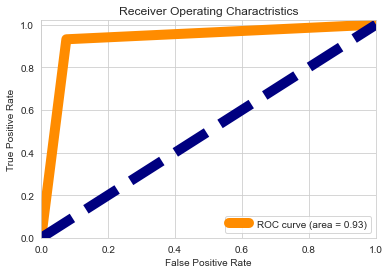

In [109]:
#checking AUC ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

# Saving the final model

In [110]:
#saving the Model

import joblib
joblib.dump(gb,'hr_analytics.pkl')

['hr_analytics.pkl']

# Loading the model:

In [114]:
loadmodel=joblib.load('hr_analytics.pkl')

In [119]:
gb.predict(x_test)

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

Conclusion:

We did EDA to understand the target label 'Attrition' and all features.

The dataset was imbalanced so we used smote technique to balance the data .

We build multiple models where GradientBossting gave me good accuracy

We did hyperparameter tuning on the best selected model.

Finally we built a model that can predict the Attrition with 92.80% accuracy